# <u>Aggregations: min, max, and Everything in Between</u>

## Summing the Values in an Array

In [3]:
import numpy as np

In [4]:
rng = np.random.default_rng()

In [11]:
# Python itself can do this using the built-in sum function

L = rng.random(100)
sum(L)

49.685918711162266

In [12]:
np.sum(L)

49.68591871116227

In [5]:
# NumPy’s version of the operation is computed much more quickly

big_array = rng.random(1000000) 

%timeit sum(big_array)
%timeit np.sum(big_array)

60.1 ms ± 1.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
323 µs ± 3.01 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [26]:
my_array = [1, 2, 10, 4, 5]

In [27]:
sum(my_array)

22

In [29]:
sum(my_array, start=2)

24

In [24]:
sum??

Signature: sum(iterable, /, start=0)
Docstring:
Return the sum of a 'start' value (default: 0) plus an iterable of numbers

When the iterable is empty, return the start value.
This function is intended specifically for use with numeric values and may
reject non-numeric types.
Type:      builtin_function_or_method


In [31]:
np.sum(my_array, 0)

22

In [32]:
my_array2 = [[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]]

In [33]:
np.sum(my_array2, 1)

array([ 6, 15, 24])

In [34]:
np.sum(my_array2, 0)

array([12, 15, 18])

## Minimum and Maximum

In [36]:
# python built-in min and max functions

min(big_array), max(big_array)

(9.035721576511335e-07, 0.9999995252877818)

In [37]:
np.min(big_array), np.max(big_array)

(9.035721576511335e-07, 0.9999995252877818)

In [6]:
%timeit min(big_array) 
%timeit np.min(big_array)

45.1 ms ± 34.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.3 ms ± 25.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
print(big_array.min(), big_array.max(), big_array.sum())

1.6162154070631374e-07 0.9999997100898703 500251.89914447494


## Multidimensional Aggregates

In [9]:
M = rng.integers(0, 10, (3,4))
M

array([[1, 9, 7, 9],
       [0, 4, 7, 3],
       [2, 0, 6, 6]])

In [10]:
M.sum()

54

In [11]:
# we can find the minimum value within each column by specifying axis=0

M.min(axis=0)

array([0, 0, 6, 3])

In [12]:
M.max(axis=1)

array([9, 7, 6])

## Other Aggregation Functions

## Example: What Is the Average Height of US Presidents?

In [13]:
!head data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163
5,James Monroe,183
6,John Quincy Adams,171
7,Andrew Jackson,185
8,Martin Van Buren,168
9,William Henry Harrison,173


In [15]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv') 
heights = np.array(data['height(cm)']) 
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185 191 182]


In [16]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        180.04545454545453
Standard deviation: 6.983599441335736
Minimum height:     163
Maximum height:     193


In [17]:
print("25th percentile: ", np.percentile(heights, 25))
print("Median: ", np.median(heights))
print("75th percentile: ", np.percentile(heights, 75))

25th percentile:  174.75
Median:  182.0
75th percentile:  183.5


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

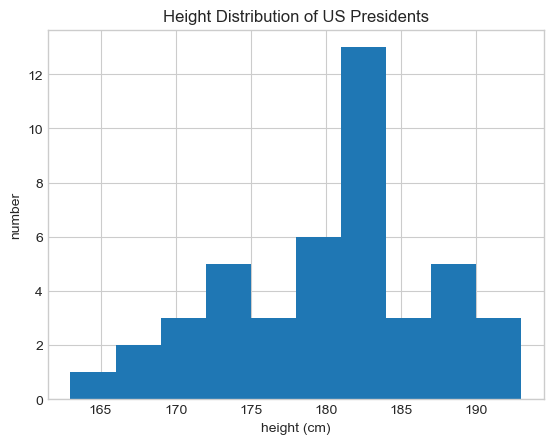

In [21]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');   # ; is used to prevent any output